Cliente llegó en el tiempo 6, eligió la caja 1
Cliente llegó en el tiempo 6, eligió la caja 1
Cliente llegó en el tiempo 4, eligió la caja 1
Cliente llegó en el tiempo 2, eligió la caja 2
Cliente llegó en el tiempo 2, eligió la caja 2
Cliente llegó en el tiempo 6, eligió la caja 2
Cliente llegó en el tiempo 2, eligió la caja 3
Cliente llegó en el tiempo 0, eligió la caja 3
Cliente llegó en el tiempo 2, eligió la caja 3
Cliente llegó en el tiempo 2, eligió la caja 2
Cliente llegó en el tiempo 4, eligió la caja 2
Cliente llegó en el tiempo 6, eligió la caja 2
Cliente llegó en el tiempo 6, eligió la caja 1
Cliente llegó en el tiempo 5, eligió la caja 1
Cliente llegó en el tiempo 3, eligió la caja 1
Cliente llegó en el tiempo 5, eligió la caja 3
Cliente llegó en el tiempo 3, eligió la caja 3
Cliente llegó en el tiempo 1, eligió la caja 3
Cliente llegó en el tiempo 1, eligió la caja 2
Cliente llegó en el tiempo 3, eligió la caja 2
Cliente llegó en el tiempo 6, eligió la caja 2
Cliente llegó

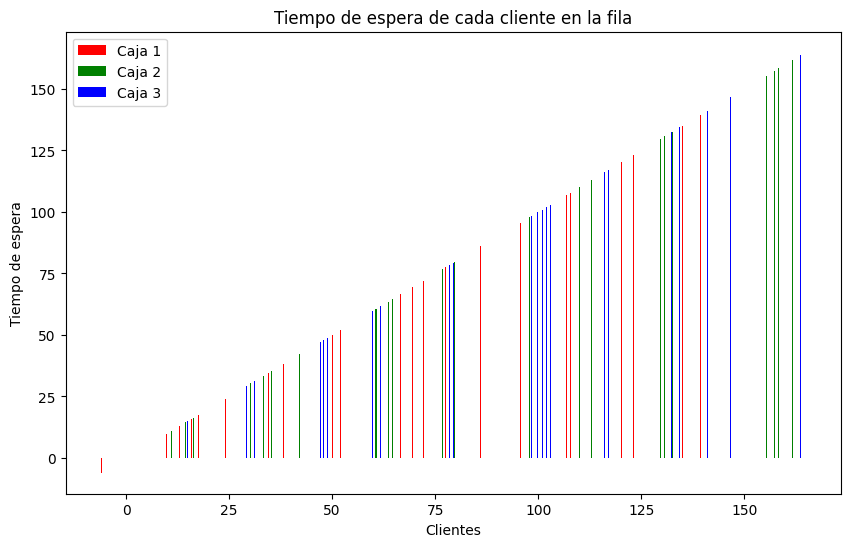

In [79]:
import numpy as np
import matplotlib.pyplot as plt

n = 100  # num usuarios
k = 3    # num cajas
mu1 = 3  # media de distribución de llegadas de clientes
mu2 = 5  # media de distribución de tiempo de uso en caja
sigma2 = 3  # desviación estándar de distribución de tiempo de uso en caja
p = 0.4   # prob de pagar en efectivo
unicaCola = 0

# genera llegadas de clientes (usando distribución de Poisson)
llegadas = np.random.poisson(mu1, n)

tiempo_uso_caja1 = []
tiempo_uso_caja2 = []
tiempo_uso_caja3 = []
tiempo_espera_fila_unica = []
tiempo_espera_fila_caja1 = []  # lista para almacenar el tiempo de espera en la fila de la caja 1
tiempo_espera_fila_caja2 = []  # lista para almacenar el tiempo de espera en la fila de la caja 2
tiempo_espera_fila_caja3 = []  # lista para almacenar el tiempo de espera en la fila de la caja 3
tiempo_libre_caja1 = []
tiempo_libre_caja2 = []
tiempo_libre_caja3 = []
cola_general = []

indices = np.arange(n)

for i, llegada in enumerate(llegadas):

    # tiempo de uso de la caja
    tiempo_uso_caja = [max(np.random.normal(mu2, sigma2), 0) for _ in range(k)]

    tiempo_espera_en_cajas = [tiempo_libre_caja1[-1] if tiempo_libre_caja1 else 0,
                               tiempo_libre_caja2[-1] if tiempo_libre_caja2 else 0,
                               tiempo_libre_caja3[-1] if tiempo_libre_caja3 else 0]

    if unicaCola:
        caja_elegida = np.argmin(tiempo_espera_en_cajas)
    else:
        if i % k == 0:
            # si es el primer cliente de un grupo de k, elige la caja con la menor espera total
            espera_total_caja1 = tiempo_libre_caja1[-1] if tiempo_libre_caja1 else 0
            espera_total_caja2 = tiempo_libre_caja2[-1] if tiempo_libre_caja2 else 0
            espera_total_caja3 = tiempo_libre_caja3[-1] if tiempo_libre_caja3 else 0
            caja_elegida = np.argmin([espera_total_caja1, espera_total_caja2, espera_total_caja3])
        else:
            # Si no es el primer cliente de un grupo de k, elige la misma caja que el cliente anterior
            caja_elegida = cola_general[i - 1]['caja_elegida'] - 1

    # medio de pago con bernoulli
    paga_en_efectivo = np.random.binomial(1, p)

    # calcula el tiempo de pago según el medio elegido
    # 2 minutos en efectivo, 70 seg en otro medio
    tiempo_pago = 2 if paga_en_efectivo else 1.16  

    # simula el tiempo de espera en la fila
    tiempo_espera = max(tiempo_espera_en_cajas) - llegada if tiempo_espera_en_cajas else 0

    # simula el tiempo de uso
    tiempo_uso = tiempo_uso_caja[caja_elegida] + tiempo_pago

    # actualiza las listas de tiempos
    if caja_elegida == 0:
        tiempo_espera_fila_caja1.append(tiempo_espera)
        tiempo_uso_caja1.append(tiempo_uso_caja[caja_elegida])
        tiempo_libre_caja1.append(max(tiempo_libre_caja1[-1] if tiempo_libre_caja1 else 0, llegada) + tiempo_uso_caja1[-1])

    elif caja_elegida == 1:
        tiempo_espera_fila_caja2.append(tiempo_espera)
        tiempo_uso_caja2.append(tiempo_uso_caja[caja_elegida])
        tiempo_libre_caja2.append(max(tiempo_libre_caja2[-1] if tiempo_libre_caja2 else 0, llegada) + tiempo_uso_caja2[-1])

    elif caja_elegida == 2:
        tiempo_espera_fila_caja3.append(tiempo_espera)
        tiempo_uso_caja3.append(tiempo_uso_caja[caja_elegida])
        tiempo_libre_caja3.append(max(tiempo_libre_caja3[-1] if tiempo_libre_caja3 else 0, llegada) + tiempo_uso_caja3[-1])

    tiempo_espera_fila_unica.append(tiempo_espera)

    cola_general.append({
        'llegada': llegada,
        'tiempo_espera': tiempo_espera,
        'tiempo_uso': tiempo_uso,
        'caja_elegida': caja_elegida + 1  # Suma 1 para hacer coincidir con el número de caja
    })

def graficoCajas():
    indices = np.arange(len(tiempo_uso_caja1))

    plt.figure(figsize=(10, 6))
    plt.plot(tiempo_uso_caja1, label='Caja 1')
    plt.plot(tiempo_uso_caja2, label='Caja 2')
    plt.plot(tiempo_uso_caja3, label='Caja 3')
    plt.title('Tiempo de uso de cada caja')
    plt.xlabel('Clientes')
    plt.ylabel('Tiempo de uso')
    plt.legend()
    plt.show()

def graficoEsperaClientes():
    plt.figure(figsize=(10, 6))
    indices = np.arange(n)

    if unicaCola:
        plt.bar(indices, tiempo_espera_fila_unica, color='orange', label='Tiempo de espera en la fila (única cola)')
    else:
        plt.bar(tiempo_espera_fila_caja1[:len(indices - 2)], tiempo_espera_fila_caja1, width=0.2, color='red', label='Caja 1')
        plt.bar(tiempo_espera_fila_caja2[:len(indices)], tiempo_espera_fila_caja2[:len(indices)], width=0.2, color='green', label='Caja 2')
        plt.bar(tiempo_espera_fila_caja3[:len(indices + 2)], tiempo_espera_fila_caja3[:len(indices)], width=0.2, color='blue', label='Caja 3')

    plt.title('Tiempo de espera de cada cliente en la fila')
    plt.xlabel('Clientes')
    plt.ylabel('Tiempo de espera')
    plt.legend()
    plt.show()


for cliente in cola_general:
    print(f"Cliente llegó en el tiempo {cliente['llegada']}, eligió la caja {cliente['caja_elegida']}")

print("Longitud de tiempo_espera_fila:", len(tiempo_espera_fila_caja1))
print("Longitud de tiempo_espera_fila:", len(tiempo_espera_fila_caja2))
print("Longitud de tiempo_espera_fila:", len(tiempo_espera_fila_caja3))
print("Longitud de indices:", len(indices))
graficoEsperaClientes()
#graficoCajas()
